Here we'll understand how to do text processing with a **Long-Short term memory Neural networks(LSTM)** which are types of **Recurrent Neural networks(RNNs)**, these are types of neural networks that are built to predict temporal sequence data (i.e data structured with a time based sequence), unlike tradittional feed forward Neural networks in which neurons takes inputs,pad them with weights & biases,activate them with activation functions & feed the output forward to a new neuron(s),RNNs refeed the last output back into the neuron to be processed with the new imput,it's weights & biases, ths allows the new output to be partly determined by the last one, thereby defining the concept of temporal sequence(last point in time determines the new point). RNNs are used for Time Series analysis, Text classification, Pattern recognition,Sentiment Analysis etc. The disadvantages of RNNs is that they can't handle long sequences of data (even though they theoretically should) Too long sequences would make RNNs have the "Exploding or Vanishing gradient problem" during backpropagation,LSTMs were created to solve this problem, they are RNNs in which each input would have a cell state,this represents the importance of each input in the sequence, it would also be another factor value to determine the output, the cell state is passed through a control logic which contains 3 gates, they are:<br>
1. forget gate: This would be an actiavtion function(sigmoid) that determines/filters how much of the new input value + previous output value should be forgotten as regards to the previous cell state.
2. input gate: An activation fucntion(sigmoid) to determine/filter how much of the activated input value(input value is activated with a "tanh function" after being added with the prevous output) should be used to update the cell state
3. output gate: An activation function(tanh) to determine/filter how much of the updated cell state value would be used to determint the new output value(the filtered cell state is passed alongside the input value & the last output value through a "sigmoid function" to determint the new output value)<br>

With the logic control gates, LSTMs can be able to work through long sequences of data without having gradient problems..

To do this project, we would use Amazon product review data from kaggle, our main focus will be on the columns that contain the reviews in text & the column that contain the numerical rating.

**Importing the Data, preprocessing & basic text corpus E.D.A**

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
data = pd.read_csv('amazon_reviews.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data = data.dropna()
data.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0


In [3]:
data['overall'] = data['overall'].apply(int)
data.head(3)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,0mie,5,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,1K3,4,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,1m2,5,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4913 entries, 1 to 4914
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewerName          4913 non-null   object 
 1   overall               4913 non-null   int64  
 2   reviewText            4913 non-null   object 
 3   reviewTime            4913 non-null   object 
 4   day_diff              4913 non-null   int64  
 5   helpful_yes           4913 non-null   int64  
 6   helpful_no            4913 non-null   int64  
 7   total_vote            4913 non-null   int64  
 8   score_pos_neg_diff    4913 non-null   int64  
 9   score_average_rating  4913 non-null   float64
 10  wilson_lower_bound    4913 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 460.6+ KB


In [5]:
data.shape

(4913, 11)

In [6]:
data.describe()

,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000
mean,4.587625,437.346224,1.311215,0.210258,1.521474,1.100957,0.075363,0.020019
std,0.996995,209.360537,41.627627,4.024098,44.132066,39.375960,0.255973,0.077156
min,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [7]:
# we reduce the data to the 2 important columns "reviewText & overall"
data = data[['reviewText','overall']]
data.head()

,reviewText,overall
1,"Purchased this for my device, it worked as adv...",5
2,it works as expected. I should have sprung for...,4
3,This think has worked out great.Had a diff. br...,5
4,"Bought it with Retail Packaging, arrived legit...",5
5,It's mini storage. It doesn't do anything els...,5


In [8]:
# getting the length of each review text
data['reviewTextLen'] = data['reviewText'].apply(lambda x : 0 if type(x)== float else len(x) )
data.head()

,reviewText,overall,reviewTextLen
1,"Purchased this for my device, it worked as adv...",5,158
2,it works as expected. I should have sprung for...,4,166
3,This think has worked out great.Had a diff. br...,5,340
4,"Bought it with Retail Packaging, arrived legit...",5,290
5,It's mini storage. It doesn't do anything els...,5,282


In [9]:
data['reviewTextLen'].nunique()

838

<AxesSubplot:ylabel='Frequency'>

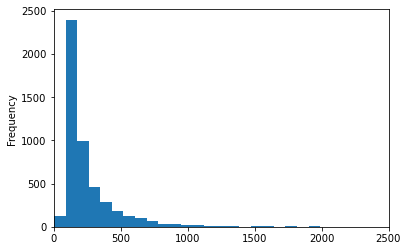

In [10]:
data['reviewTextLen'].plot(kind="hist",xlim=(0,2500),bins=100)

<AxesSubplot:ylabel='Frequency'>

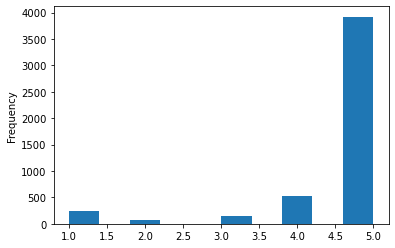

In [11]:
data['overall'].plot(kind="hist")

In [12]:
# importing the text processing tools from the "string & nltk" libraries 
import string, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


False

In [13]:
# cleaning each text of punctuations & stopwords
def cleaner(x):
    cln = [word for word in x if word not in string.punctuation]
    cln = ''.join(cln)
    return [word for word in cln.split() if word.lower() not in stopwords.words('english')]

In [14]:
# categorization of target values into text form
def sentiments(x):
    if x == 5 :
        snt = 'loves our product'
    if x == 4:
        snt = 'likes our product'
    if x == 3:
        snt = 'prefers our product'
    if x == 2:
        snt = 'isn\'t impressed by our product'
    if x == 1:
        snt = 'doesn\'t like our product'
    return snt

In [15]:
data['reviewText'] = data['reviewText'].apply(cleaner)
data['sentiment'] = data['overall'].apply(sentiments)

In [16]:
dataX = data

<AxesSubplot:xlabel='reviewTextLen', ylabel='Count'>

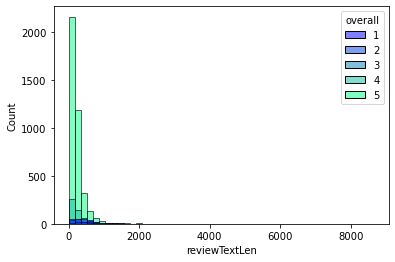

In [17]:
# visualizing the length of review texts by the ratings
sns.histplot(data=data, x='reviewTextLen',hue='overall',bins=50,palette='winter')

**Advanced Text corpus E.D.A(weighing the importance of each part of speech in the corpus)**: We will do this by first extracting each word in the reviews & replacing them with their part of speech,using the "pos_tag" method from "nltk", we will then use the "CountVectorizer" module from scikit-learn to convert the part of speech tags in the reviews to numeric values, then we would use the "TfIdf vectorizer" module to calculate the importance of each part of speech in each review relative to the whole/corpus or document,then we would create a new dataframe & then visualize the part of speech importance for each reviews to the ratings they were given.

In [18]:
# creating te part of speech tag function
def pos_tag(x):
    tag_list = nltk.pos_tag(x)
    tagger = []
    for v in tag_list:
        v = list(v)
        if v[1] in ['NN','NNP','NNPS','NNS']:
            v[1] = 'noun'
            tagger.append(v[1])
        if v[1] in ['VB','VBD','VBG','VBN','VBP','VBZ']:
            v[1] = 'verb'
            tagger.append(v[1])
        if v[1] == 'CC':
            v[1] = 'conjuction'
            tagger.append(v[1])
        if v[1] == 'CD':
            v[1] = 'numeric & dates'
            tagger.append(v[1])
        if v[1] == 'DT':
            v[1] = 'determiner'
            tagger.append(v[1])
        if v[1] == 'FW':
            v[1] = 'foreign word'
            tagger.append(v[1])
        if v[1] == 'IN':
            v[1] = 'Conjunction'
            tagger.append(v[1])
        if v[1] in ['JJ','JJR','JJS']:
            v[1] = 'Adjective'
            tagger.append(v[1])
        if v[1] in ['PRP','PRP$']:
            v[1] = 'pronoun'
            tagger.append(v[1])
        if v[1] in ['RB','RBR','RBS']:
            v[1] = 'Adverb'
        if v[1] == 'UH':
            v[1] = 'Interjection'
            tagger.append(v[1])
        if v[1] == 'MD':
            v[1] = 'Modal auxiliary'
            tagger.append(v[1])
        if v[1] == 'RP':
            v[1] = 'Particle'
            tagger.append(v[1])
        if v[1] == 'SYM':
            v[1] = 'Symbol'
            tagger.append(v[1])
    return tagger

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
# turning each part of speech to a numerical value
vector = CountVectorizer(analyzer=pos_tag).fit(dataX['reviewText'])

In [21]:
vector.vocabulary_

{'verb': 11,
 'noun': 8,
 'Adjective': 0,
 'Conjunction': 1,
 'numeric & dates': 9,
 'Modal auxiliary': 3,
 'foreign word': 7,
 'Particle': 4,
 'determiner': 6,
 'conjuction': 5,
 'pronoun': 10,
 'Interjection': 2}

In [22]:
x_data = vector.transform(dataX['reviewText'])

In [23]:
x_data.shape

(4913, 12)

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer

In [25]:
# calculating the term frequency inverse document frequency(ie importance) of each part of speech in the general text
tfidf = TfidfTransformer()
tfidf.fit(x_data)
tx_data = tfidf.transform(x_data) 
tx_data.shape

(4913, 12)

In [26]:
# creating the new dataframe to hold the 'tfidf values" & the ratings'
c = 0
lx = []
new_data = pd.DataFrame.sparse.from_spmatrix(tx_data)
while len(lx) < len(vector.vocabulary_) :
    for x,y in vector.vocabulary_.items():
        try:
            if y == new_data.columns.values[c]:
                lx.append(x)
                c += 1
            else:
                pass
        except IndexError :
            pass
new_data.columns = lx
new_data.index = [x for x in range(1,len(new_data)+1)]
new_data['rating'] = dataX['overall']
new_data.dropna(inplace=True)
new_data['rating'] = new_data['rating'] .apply(int)
new_data.head()
new_data.head()

,Adjective,Conjunction,Interjection,Modal auxiliary,Particle,conjuction,determiner,foreign word,noun,numeric & dates,pronoun,verb,rating
1,0.140029,0.297126,0.0,0.0,0.0,0.0,0.0,0.0,0.905890,0.000000,0.0,0.267339,5
2,0.515824,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.595895,0.000000,0.0,0.615496,4
3,0.209739,0.296694,0.0,0.0,0.0,0.0,0.0,0.0,0.775349,0.394295,0.0,0.333688,5
4,0.304013,0.107513,0.0,0.0,0.0,0.0,0.0,0.0,0.889718,0.214321,0.0,0.241838,5
5,0.076866,0.163101,0.0,0.0,0.0,0.0,0.0,0.0,0.852460,0.216754,0.0,0.440250,5


<AxesSubplot:>

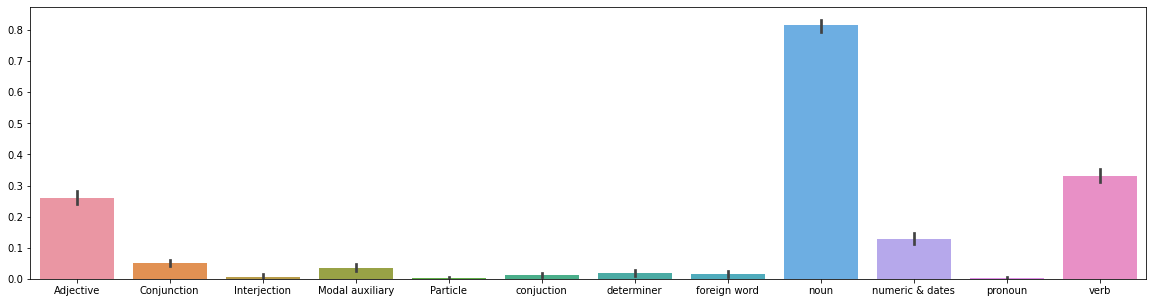

In [27]:
# plotting the part of speech "tfidf values" for ratings equal to 1
plt.figure(figsize=(20,5))
d1 = new_data[new_data['rating']==1]
sns.barplot(data =d1[d1.columns[:-1]])

<AxesSubplot:>

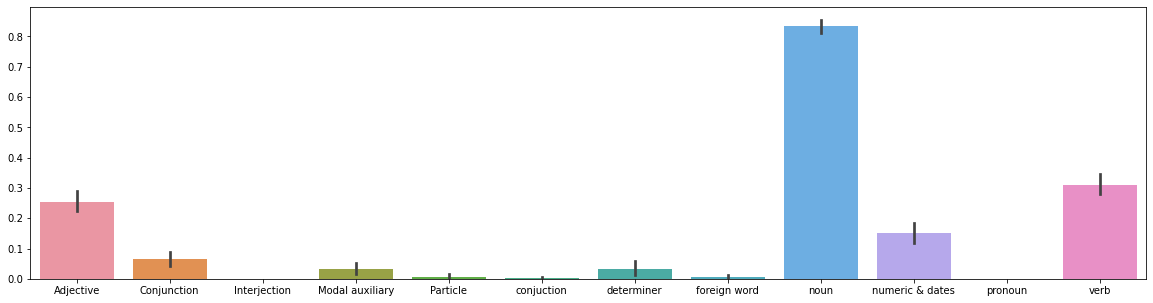

In [28]:
# plotting the part of speech "tfidf values" for ratings equal to 2
plt.figure(figsize=(20,5))
d2 = new_data[new_data['rating']==2]
sns.barplot(data =d2[d2.columns[:-1]])

<AxesSubplot:>

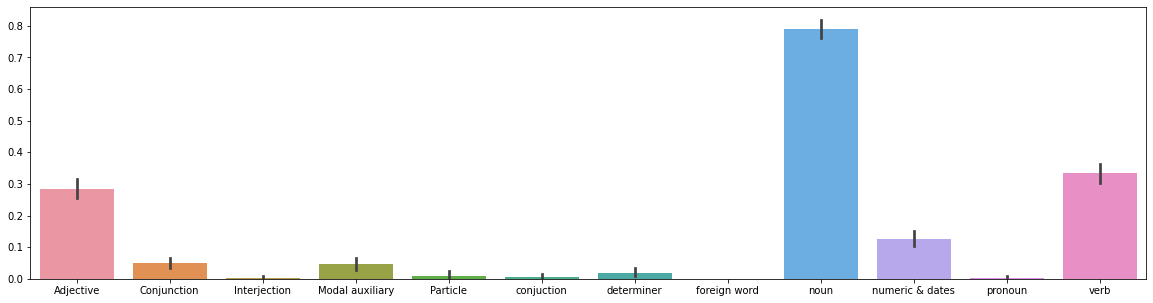

In [29]:
# plotting the part of speech "tfidf values" for ratings equal to 3
plt.figure(figsize=(20,5))
d3 = new_data[new_data['rating']==3]
sns.barplot(data =d3[d3.columns[:-1]])

<AxesSubplot:>

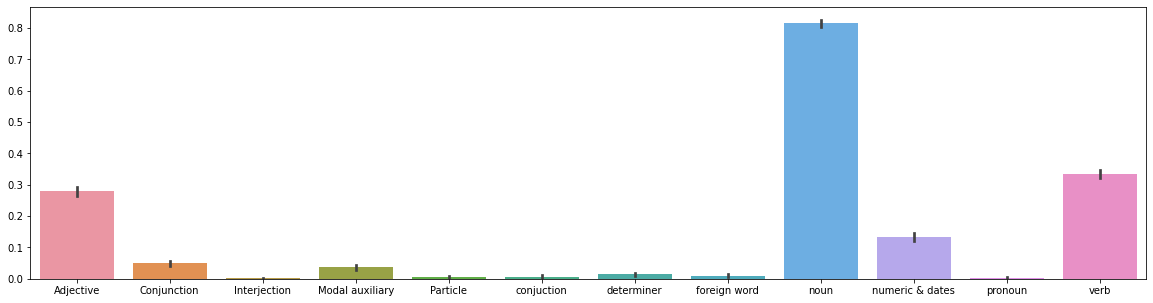

In [30]:
# plotting the part of speech "tfidf values" for ratings equal to 4
plt.figure(figsize=(20,5))
d4 = new_data[new_data['rating']==4]
sns.barplot(data =d4[d4.columns[:-1]])

<AxesSubplot:>

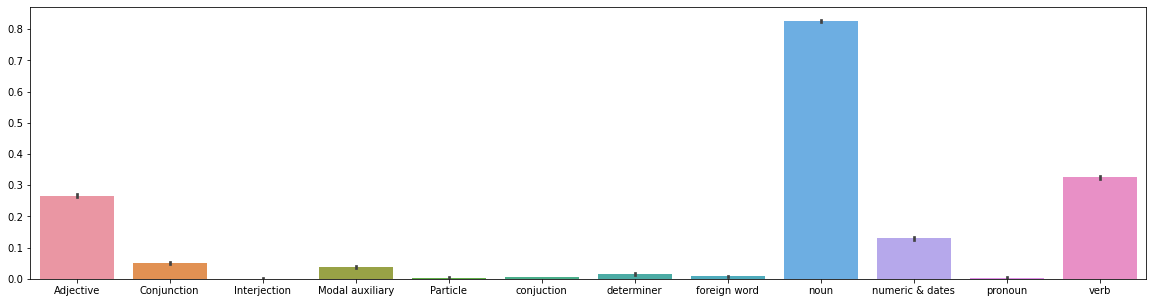

In [31]:
# plotting the part of speech "tfidf values" for ratings equal to 5
plt.figure(figsize=(20,5))
d5 = new_data[new_data['rating']==5]
sns.barplot(data =d5[d5.columns[:-1]])

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

**Preprocessing the data to feed the model**: before we create the LSTM model, we must first preprocess the Data,for the input data we would
- Tokenize it ie convert each word in the corpus to a numerical value (this would be done with the "Tokenizer" function from keras,this is keras version of "CountVectorizer" in scikit learn).
- Regulate & standardise the length of each tokenized review so they all have the same length(this is done with the "pad_sequences" function from keras).<br>

For the output data, we would encode them as labels(this is done with the LabelEncoder object from keras)

In [33]:
tokenizer = Tokenizer() # the "num_word" kwarg takes the number of words the Tokenizer object should process 
# & retain this should by standard be the total amount of words in the data, which would be gotten from the ".size" method of 
# the text dataframe. 
tokenizer.fit_on_texts(data['reviewText'].values) # this will fit the words in the text data to the Tokenizer
X = tokenizer.texts_to_sequences(data['reviewText'].values) # this will transform the text data to the numerical sequence values
# after the tokenizer has been fitted
X = pad_sequences(X,maxlen=406) # the "maxlen" kwarg would determine the maximum length that all the tokenised sequence should
# be, if a sequence is longer than the specified maxlen it would be truncated ie shortened to the maxlength, if a sequence is 
# shorter it will be padded (ie zero values would be added to fill it to the max length)
X.shape

(4913, 406)

In [34]:
lb=LabelEncoder()
data['sentiment'] = lb.fit_transform(data['sentiment']) # the label data is fitted & transformed to the labels for the model
y = pd.get_dummies(data['sentiment']).values # because we're dealing with a multi-class classification problem, we do one-hot
# encoding of the lables by turning them into the dummy variable arrays

In [35]:
# splitting the data\
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Creating the LSTM model**: The model will be made up of 3 main parts,"The Embedding Layer, The main LSTM layer(s),The Dense Layer.
1. The Embedded Layer is used to vectorise the tokenised data(ie turn each numerical value into the tokenised data to a specified number of dense vector of values),it has 3 kwargs,"imput_dim"(takes the size of the vocalbulary ie the amount of values in the tokenized input data,this is either the value given as the value of the "num_wwords" kwarg of "Tokenizer" or can be gotten by measuring the length of all the tokenized words which is stored in a dictionary, this dictionary is gotten from the ".word_index" method of the "Tokenizer" instance, note that after getting the length you will add 1 to cover an empty index of 0 in the dictionary ),"output_dim"(the specified number of vector values the each tokenised value should be turned into),"input_length"(The size of the sequence which would be the maximum length specified during padding)
2. The LSTM leyer is the main layer for the sequence processing,it takes in the now embedded values for long-short term recurrent processing,the most important kwargs are,"dropout"(is used to prevent overfitting within the model by randomly switching off some neurons),"recurrent_dropout"(this is the dropout function for randomly switching off recurrent neurons when the previous output is being refed into the layer),"return_sequences"(to specify if the layer should return all the output value of every sequence iteration after the final sequence is done,it is used if we're going to add another LSTM layer ontop of the previous one so that it can take information from the last layer )
3. The Dense Layer will be used to flatten the final output of the LSTM layer & then use it to generate the final preidction.
<br>

A minor layer used to be integrated into the model is the SpatialDroupout1D which is a droput layer that would placed above the Embedding layer to randomly switch off the units on the Embediing Layer, the difference between SpatialDroupout1D & conventional dropout layers, is that SpatialDroupout1D switch off all units on random 1-dimensional space instead of single units..

In [36]:
# creating a callback instance for the model with "EarlyStopping"
early_stop = EarlyStopping(patience=10) 

In [37]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=20,input_length=406))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(100,dropout=0.5,recurrent_dropout=0.5,return_sequences=True))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(optimizer="adam",loss="categorical_crossentropy")

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 406, 20)           220900    
                                                                 
 spatial_dropout1d (SpatialD  (None, 406, 20)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 406, 100)          48400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 5)                 505       
                                                                 
Total params: 350,205
Trainable params: 350,205
Non-trainable params: 0
__________________________________________________

In [38]:
# training the model
model.fit(X_train,y_train,epochs=20,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/20
27/27 [==============================] - 256s 9s/step - loss: 0.9749 - val_loss: 0.7662
Epoch 2/20
27/27 [==============================] - 266s 10s/step - loss: 0.7224 - val_loss: 0.7350
Epoch 3/20
27/27 [==============================] - 295s 11s/step - loss: 0.6657 - val_loss: 0.6998
Epoch 4/20
27/27 [==============================] - 314s 12s/step - loss: 0.6034 - val_loss: 0.6482
Epoch 5/20
27/27 [==============================] - 318s 12s/step - loss: 0.5408 - val_loss: 0.6422
Epoch 6/20
27/27 [==============================] - 294s 11s/step - loss: 0.4999 - val_loss: 0.6637
Epoch 7/20
27/27 [==============================] - 295s 11s/step - loss: 0.4737 - val_loss: 0.6667
Epoch 8/20
27/27 [==============================] - 287s 11s/step - loss: 0.4507 - val_loss: 0.6682
Epoch 9/20
27/27 [==============================] - 288s 11s/step - loss: 0.4269 - val_loss: 0.6918
Epoch 10/20
27/27 [==============================] - 287s 11s/step - loss: 0.4075 - val_loss: 0.7097


<AxesSubplot:>

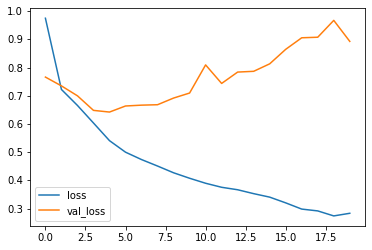

In [39]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [40]:
pred =  np.round(model.predict(X_test)).astype(int)
pred

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [41]:
# evaluating the model performance
from sklearn.metrics import classification_report,confusion_matrix, explained_variance_score

In [42]:
print(classification_report(y_test,pred))
print(confusion_matrix( np.argmax(y_test,axis=1), np.argmax(pred,axis=1)))

              precision    recall  f1-score   support

           0       0.64      0.22      0.33        82
           1       0.00      0.00      0.00        22
           2       0.18      0.20      0.19       161
           3       0.85      0.89      0.87      1165
           4       0.00      0.00      0.00        44

   micro avg       0.76      0.73      0.75      1474
   macro avg       0.33      0.26      0.28      1474
weighted avg       0.73      0.73      0.73      1474
 samples avg       0.73      0.73      0.73      1474

[[  40    0   20   22    0]
 [  10    0    5    7    0]
 [   8    0   32  121    0]
 [  18    0  115 1032    0]
 [   5    0   10   29    0]]


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
